<a href="https://colab.research.google.com/github/tada20001/NLP_2023/blob/main/CH18_03_KoBERT%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 데이터 전처리
--------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7fee78e98160>)

In [3]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [4]:
train_data.shape, test_data.shape

((150000, 3), (50000, 3))

In [5]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [7]:
# 데이터 중복여부 검토
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [8]:
train_data.drop_duplicates(subset=['document'], inplace=True)
test_data.drop_duplicates(subset=['document'], inplace=True)

In [9]:
train_data = train_data.reset_index()
test_data = test_data.reset_index()

train_data.shape, test_data.shape

((146183, 4), (49158, 4))

<Axes: >

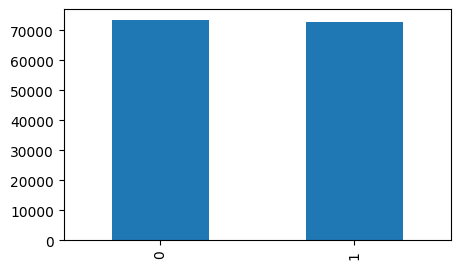

In [10]:
plt.figure(figsize=(5, 3))
train_data['label'].value_counts().plot(kind='bar')

<Axes: >

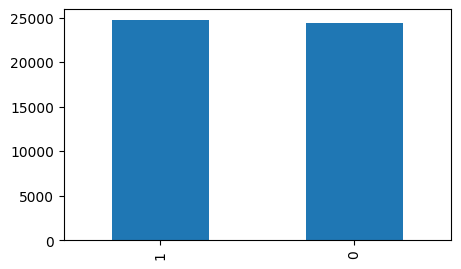

In [11]:
plt.figure(figsize=(5, 3))
test_data['label'].value_counts().plot(kind='bar')

In [12]:
# 빈값 확인
train_data.isnull().sum()

index       0
id          0
document    1
label       0
dtype: int64

In [13]:
test_data.isnull().sum()

index       0
id          0
document    1
label       0
dtype: int64

In [14]:
# 빈값 제거
train_data = train_data.dropna(how='any')
train_data = train_data.reset_index()

test_data = test_data.dropna(how='any')
test_data = test_data.reset_index()

In [15]:
del train_data['level_0'], train_data['index']
del test_data['level_0'], test_data['index']

In [16]:
train_data.columns

Index(['id', 'document', 'label'], dtype='object')

In [17]:
train_data.shape, test_data.shape

((146182, 3), (49157, 3))

### 2. 토크나이저를 이용한 정수 인코딩
---------------------------
이미 학습해 놓은 모델을 사용한다고 하면, 
* 토크나이저
* 모델

이 두가지를 로드해야 함

In [18]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.3 MB/s eta 0:00:00


In [19]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained('klue/bert-base')

In [20]:
X_train_list = train_data['document'].tolist()
X_test_list = test_data['document'].tolist()
y_train = train_data['label'].tolist()
y_test = test_data['label'].tolist()

In [21]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [22]:
X_train[0]

Encoding(num_tokens=142, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [23]:
print(X_train[0].tokens)

['[CLS]', '아', '더', '##빙', '.', '.', '진짜', '짜증', '##나', '##네', '##요', '목소리', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD

In [24]:
train_data['document'][0]

'아 더빙.. 진짜 짜증나네요 목소리'

In [25]:
print(X_train[0].ids)

[2, 1376, 831, 2604, 18, 18, 4229, 9801, 2075, 2203, 2182, 4243, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [26]:
print(X_train[0].type_ids)  # 문장 하나이기 때문에 모두 0.. 시크먼트 인코딩 결과과

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [27]:
print(X_train[0].attention_mask)  # 패딩이 아닌 부분 1로 표시. 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 3. 데이터셋 생성 및 모델 학습
----------------------

In [28]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((dict(X_train), y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(X_test), y_test))

In [29]:
from transformers import TFBertForSequenceClassification  # 다대일 모델
from tensorflow.keras.callbacks import EarlyStopping


In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [31]:
model = TFBertForSequenceClassification.from_pretrained('klue/bert-base', num_labels=2, from_pt=True)
model.compile(optimizer=optimizer, loss=model.hf_compute_loss, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
model.hf_compute_loss

<bound method TFSequenceClassificationLoss.hf_compute_loss of <transformers.models.bert.modeling_tf_bert.TFBertForSequenceClassification object at 0x7fecb9596fb0>>

In [33]:
callback_earlystop = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience=2)

model.fit(
    train_dataset.shuffle(10000).batch(32), epochs=5, batch_size=64, 
    validation_data=val_dataset.shuffle(10000).batch(64),
    callbacks=[callback_earlystop]
)

Epoch 1/5
4569/4569 [==============================] - 4509s 974ms/step - loss: 0.2828 - accuracy: 0.8807 - val_loss: 0.2656 - val_accuracy: 0.8943
Epoch 2/5
4569/4569 [==============================] - 4417s 967ms/step - loss: 0.1955 - accuracy: 0.9226 - val_loss: 0.2722 - val_accuracy: 0.8963
Epoch 3/5
4569/4569 [==============================] - 4419s 967ms/step - loss: 0.1352 - accuracy: 0.9490 - val_loss: 0.2860 - val_accuracy: 0.8973
Epoch 4/5
4569/4569 [==============================] - 4417s 967ms/step - loss: 0.0965 - accuracy: 0.9651 - val_loss: 0.3334 - val_accuracy: 0.8907


In [34]:
model.evaluate(val_dataset.batch(1024))

49/49 [==============================] - 421s 9s/step - loss: 0.3334 - accuracy: 0.8907


[0.33335235714912415, 0.8906564712524414]

### 4. 모델 저장
----------------

In [35]:
model.save_pretrained('nsmc_model/naver_movie')
tokenizer.save_pretrained('nsmc_model/naver_movie')

('nsmc_model/naver_movie/tokenizer_config.json',
 'nsmc_model/naver_movie/special_tokens_map.json',
 'nsmc_model/naver_movie/vocab.txt',
 'nsmc_model/naver_movie/added_tokens.json',
 'nsmc_model/naver_movie/tokenizer.json')

### 5. 모델 로드 및 테스트
-----------------

In [36]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained('nsmc_model/naver_movie')
loaded_model = TFBertForSequenceClassification.from_pretrained('nsmc_model/naver_movie')

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer,
    model=loaded_model,
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at nsmc_model/naver_movie were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nsmc_model/naver_movie.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/te

In [41]:
text_classifier(test_data['document'][2])[0]

[{'label': 'LABEL_0', 'score': 0.9632452130317688},
 {'label': 'LABEL_1', 'score': 0.03675481304526329}]

In [42]:
test_data['document'][2]

'뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아'

In [43]:
test_data['label'][2]

0

In [44]:
text_classifier('오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함')[0]

[{'label': 'LABEL_0', 'score': 0.020017042756080627},
 {'label': 'LABEL_1', 'score': 0.9799829721450806}]